In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/REPROGRAMA/PROJETO FINAL/acidentes_transito2023.ipynb')


In [ ]:
dados.head()

,_id,Protocolo,data,hora,natureza,situacao,bairro,endereco,detalhe_endereco_acidente,complemento,...,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,vitimas,vitimasfatais
0,1,202300005,2023-01-01 00:00:00,03:37:00,COM VÍTIMA,FINALIZADA,MADALENA,AV ENGENHEIRO ABDIAS DE CARVALHO,NaN,E/F AO POSTO BR - ANTES DA FIR - SENTIDO SUB/CID,...,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0
1,2,202300009,2023-01-01 00:00:00,08:28:00,COM VÍTIMA,FINALIZADA,BONGI,AV ENGENHEIRO ABDIAS DE CARVALHO,RUA CARLOS GOMES,EM FRENTE AO POSTO DE GASOLINA DISLUB,...,COLISÃO LATERAL,0,2,0,0,0,0,0,2,0
2,3,202300019,2023-01-01 00:00:00,10:39:00,COM VÍTIMA,FINALIZADA,JAQUEIRA,RUA MUNIZ TAVARES,AV RUI BARBOSA,DE ESQUINA COM O HOSPITAL MARIA LUCINDA,...,COLISÃO LATERAL,1,1,0,0,0,0,0,1,0
3,4,202300022,2023-01-01 00:00:00,12:41:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,PROX AO SEMAFORO 152 E PROX AO CASTELINHO,...,COLISÃO TRASEIRA,2,0,0,0,0,0,0,0,0
4,5,202300037,2023-01-01 00:00:00,03:44:00,COM VÍTIMA,FINALIZADA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,NaN,PROX A PRAÇA CIDADE DO PORTO,...,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0


In [ ]:
#Identifica valores nulos
dados.isnull().sum()

,0
_id,0
Protocolo,0
data,0
hora,0
natureza,0
situacao,0
bairro,12
endereco,6
detalhe_endereco_acidente,3341
complemento,320


In [ ]:
#Excluir colunas que são insignificativas para a análise atual
dados=dados.drop(columns=['Protocolo','detalhe_endereco_acidente','sentido_via'])

In [ ]:
# Substitui valores faltantes nas seguintes colunas, garantindo que não haja entradas vazias e facilitando a análise posterior.
dados['complemento'] = dados['complemento'].fillna('Não informado')
dados['bairro_cruzamento'] = dados['bairro_cruzamento'].fillna('Não informado')
dados['bairro'] = dados['bairro'].fillna('Não informado')
dados['endereco'] = dados['bairro'].fillna('Não informado')

In [ ]:
# Remove linhas com valores nulos na coluna 'tipo', pois esses casos são mínimos em relação ao DF completo, garantindo que a análise não seja comprometida
dados = dados.dropna(subset=['tipo'])

In [ ]:
#Confere se todos os valores nulos foram removidos
dados.isnull().sum()

,0
_id,0
data,0
hora,0
natureza,0
situacao,0
bairro,0
endereco,0
complemento,0
bairro_cruzamento,0
tipo,0


In [ ]:
#Retorna a contagem de valores em cada coluna, focando especialmente nas colunas que descrevem o tipo de automóvel envolvido no acidente, para entender a distribuição e frequência dos diferentes tipos.
dados.sum()

,0
_id,7970657
data,2023-01-01 00:00:002023-01-01 00:00:002023-01-...
hora,03:37:0008:28:0010:39:0012:41:0003:44:0004:35:...
natureza,COM VÍTIMACOM VÍTIMACOM VÍTIMASEM VÍTIMACOM VÍ...
situacao,FINALIZADAFINALIZADAFINALIZADAFINALIZADAFINALI...
bairro,MADALENABONGIJAQUEIRABOA VIAGEMBOA VIAGEMSAN M...
endereco,MADALENABONGIJAQUEIRABOA VIAGEMBOA VIAGEMSAN M...
complemento,E/F AO POSTO BR - ANTES DA FIR - SENTIDO SUB/C...
bairro_cruzamento,MADALENABONGIJAQUEIRABOA VIAGEMBOA VIAGEMSAN M...
tipo,ATROPELAMENTO DE PESSOACOLISÃO LATERALCOLISÃO ...


In [ ]:
# Renomeia as colunas para um melhor entendimento
dados = dados.rename(columns={'natureza': 'natureza_acidente'})
dados = dados.rename(columns={'tipo': 'tipo_acidente'})
dados = dados.rename(columns={'auto': 'carro'})
dados = dados.rename(columns={'vitimas': 'vitimas_não_fatais'})
dados = dados.rename(columns={'vitimasfatais': 'vitimas_fatais'})

In [ ]:
## Conta as ocorrências de cada valor na coluna 'Tipo de Acidente	', permitindo analisar a distribuição dos dados.
dados['tipo_acidente'].value_counts()


,count
tipo_acidente,
COLISÃO LATERAL,1556
COLISÃO,600
COLISÃO TRASEIRA,534
COLISÃO FRONTAL,442
ATROPELAMENTO DE PESSOA,212
COLISÃO TRANSVERSAL,176
CHOQUE,127
QUEDA,108
COLISÃO COM CICLISTA,102


In [ ]:
## Conta as ocorrências de cada valor na coluna 'Tipo de Acidente	', permitindo analisar a distribuição dos dados.
dados['natureza_acidente'].value_counts()

,count
natureza_acidente,
COM VÍTIMA,3372
SEM VÍTIMA,508
VÍTIMA FATAL,30


In [ ]:
# Conta o total de acidentes envolvendo pelo menos uma motocicleta.
acidentes_com_motos = (dados['moto'] >= 1).sum()
acidentes_com_motos


2787

In [ ]:
# Conta o total de acidentes envolvendo pelo menos um carro.
acidentes_carros_motos = (dados['carro'] >= 1).sum()
acidentes_carros_motos


2155

In [ ]:
# Conta o total de acidentes envolvendo pelo menos um pedestre.
acidentes_com_motos = (dados['pedestre'] >= 1).sum()
acidentes_com_motos


215

In [ ]:
# Conta o total de acidentes envolvendo pelo menos um ciclista.
acidentes_com_motos = (dados['ciclista'] >= 1).sum()
acidentes_com_motos

144

In [ ]:
# Cria uma nova coluna 'Mês' que retorna o mês baseado na coluna 'data', após garantir que a coluna está no formato datetime
dados['data'] = pd.to_datetime(dados['data'])
dados['Mes'] = dados['data'].dt.month


In [ ]:
#Confere se a nova coluna foi criada
dados.head(1000)

,_id,data,hora,natureza_acidente,situacao,bairro,endereco,complemento,bairro_cruzamento,tipo_acidente,carro,moto,ciclista,pedestre,onibus,caminhao,viatura,vitimas_não_fatais,vitimas_fatais,Mes
0,1,2023-01-01,03:37:00,COM VÍTIMA,FINALIZADA,MADALENA,MADALENA,E/F AO POSTO BR - ANTES DA FIR - SENTIDO SUB/CID,MADALENA,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0,1
1,2,2023-01-01,08:28:00,COM VÍTIMA,FINALIZADA,BONGI,BONGI,EM FRENTE AO POSTO DE GASOLINA DISLUB,BONGI,COLISÃO LATERAL,0,2,0,0,0,0,0,2,0,1
2,3,2023-01-01,10:39:00,COM VÍTIMA,FINALIZADA,JAQUEIRA,JAQUEIRA,DE ESQUINA COM O HOSPITAL MARIA LUCINDA,JAQUEIRA,COLISÃO LATERAL,1,1,0,0,0,0,0,1,0,1
3,4,2023-01-01,12:41:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,BOA VIAGEM,PROX AO SEMAFORO 152 E PROX AO CASTELINHO,BOA VIAGEM,COLISÃO TRASEIRA,2,0,0,0,0,0,0,0,0,1
4,5,2023-01-01,03:44:00,COM VÍTIMA,FINALIZADA,BOA VIAGEM,BOA VIAGEM,PROX A PRAÇA CIDADE DO PORTO,BOA VIAGEM,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1055,2023-05-11,09:45:00,COM VÍTIMA,FINALIZADA,ILHA DO RETIRO,ILHA DO RETIRO,Não informado,ILHA DO RETIRO,ATROPELAMENTO DE PESSOA,0,1,0,0,0,0,0,1,0,5
1057,1058,2023-05-11,11:34:00,COM VÍTIMA,FINALIZADA,BARRO,BARRO,EM FRENTE AO COLEGIO EMACULADA DA CONCEIÇÃO,BARRO,ATROPELAMENTO DE PESSOA,0,1,0,1,0,0,0,1,0,5
1058,1059,2023-05-11,06:11:00,COM VÍTIMA,FINALIZADA,ESPINHEIRO,ESPINHEIRO,NA FRENTE DO EDIFICIO FIQUEIRAS,ESPINHEIRO,COLISÃO LATERAL,1,1,0,0,0,0,0,1,0,5
1059,1060,2023-05-11,06:27:00,COM VÍTIMA,FINALIZADA,CASA FORTE,CASA FORTE,Centro Médico Sen. José Ermírio de Moraes,CASA FORTE,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0,5


In [ ]:
# Filtrar dados para identificar acidentes ocorridos durante a madrugada (00h às 06h)
dados.loc[(dados['hora'] >= '00:00:00') & (dados['hora'] <= '06:00:00')]

,_id,data,hora,natureza_acidente,situacao,bairro,endereco,complemento,bairro_cruzamento,tipo_acidente,carro,moto,ciclista,pedestre,onibus,caminhao,viatura,vitimas_não_fatais,vitimas_fatais,Mes
0,1,2023-01-01,03:37:00,COM VÍTIMA,FINALIZADA,MADALENA,MADALENA,E/F AO POSTO BR - ANTES DA FIR - SENTIDO SUB/CID,MADALENA,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0,1
4,5,2023-01-01,03:44:00,COM VÍTIMA,FINALIZADA,BOA VIAGEM,BOA VIAGEM,PROX A PRAÇA CIDADE DO PORTO,BOA VIAGEM,ATROPELAMENTO DE PESSOA,1,0,0,1,0,0,0,1,0,1
5,6,2023-01-01,04:35:00,COM VÍTIMA,FINALIZADA,SAN MARTIN,SAN MARTIN,DE FRENTE A CAVALARIA,SAN MARTIN,COLISÃO FRONTAL,1,1,0,0,0,0,0,1,0,1
6,7,2023-01-01,05:34:00,SEM VÍTIMA,FINALIZADA,PINA,PINA,CANTEIRO CENTRAL DA VIA MANGUE,PINA,CHOQUE,1,0,0,0,0,0,0,0,0,1
8,9,2023-01-02,05:34:00,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,IMBIRIBEIRA,AO LADO DO ATACADÃO,IMBIRIBEIRA,COLISÃO LATERAL,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,4021,2023-12-30,02:37:00,COM VÍTIMA,FINALIZADA,CASA FORTE,CASA FORTE,EM FRENTE AO ERMIRIO DE MORAES,CASA FORTE,COLISÃO LATERAL,1,1,0,0,0,0,0,2,0,12
4021,4022,2023-12-30,03:06:00,COM VÍTIMA,FINALIZADA,FUNDAO,FUNDAO,PROXIMO A FARMACIA DO TRABALHADOR E PADARIA SU...,FUNDAO,COLISÃO,0,1,0,0,0,0,0,1,0,12
4022,4023,2023-12-30,04:51:00,COM VÍTIMA,FINALIZADA,SAO JOSE,SAO JOSE,EM FRENTE AO TRE E PROXIMO AO FORTE DAS CINCO ...,SAO JOSE,COLISÃO,0,1,0,0,0,0,0,1,0,12
4023,4024,2023-12-30,05:45:00,COM VÍTIMA,FINALIZADA,JORDAO,JORDAO,NA SUBIDA DA LADEIRA DO JORDÃO ALTO E EM FRENT...,JORDAO,COLISÃO,0,1,0,0,0,0,0,1,0,12


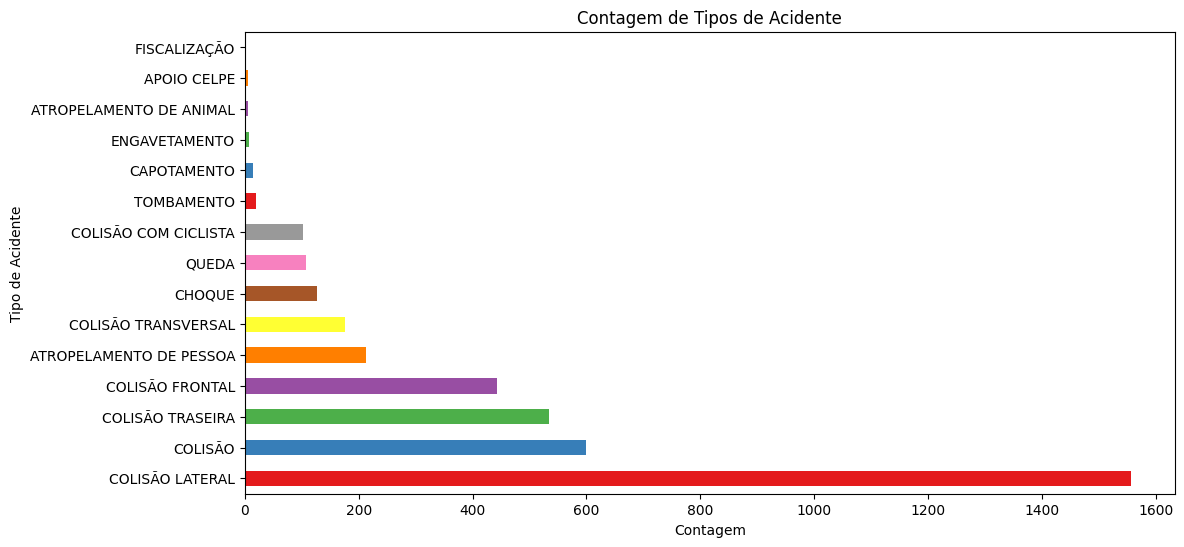

In [ ]:
# Gráfico de barras que mostra a contagem de ocorrências para cada tipo de acidente.
contagem = dados['tipo_acidente'].value_counts()

plt.figure(figsize=(12, 6))
paleta = sns.color_palette("Set1", len(contagem))
contagem.plot(kind='barh', color=paleta)
plt.title('Contagem de Tipos de Acidente')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Acidente')
plt.show()


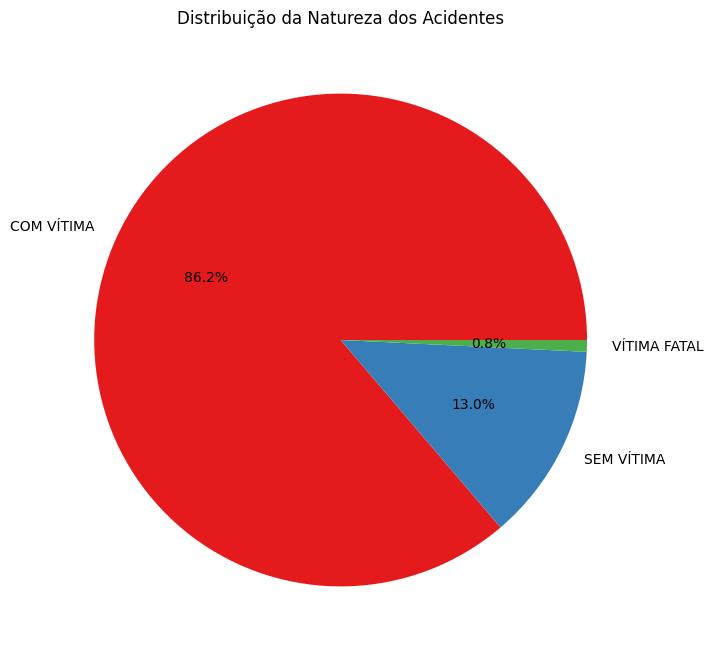

In [ ]:
#Gráfico de pizza que mostra a distribuição das diferentes naturezas dos acidentes.
contagem = dados['natureza_acidente'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', colors=sns.color_palette("Set1", len(contagem)))
plt.title('Distribuição da Natureza dos Acidentes')
plt.show()



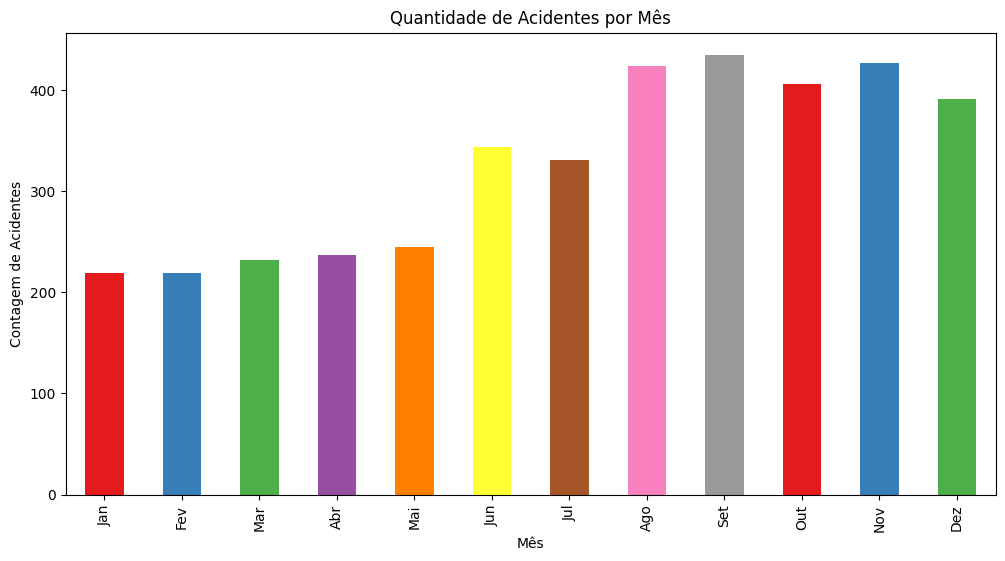

In [ ]:

# Contar a quantidade de acidentes por mês
contagem_acidentes = dados['Mes'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
paleta = sns.color_palette("Set1", len(contagem_acidentes))
contagem_acidentes.plot(kind='bar', color=paleta)

plt.title('Quantidade de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem de Acidentes')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()


In [ ]:
# Exporta o DataFrame 'dados' para um arquivo CSV no Google Drive
dados.to_csv('/content/drive/MyDrive/REPROGRAMA/PROJETO FINAL/projeto_final.csv', index=False)
